# Correlation Lab

### Introduction

In this lesson, we'll practice reducing selecting features with the california housing dataset.

### Loading the data

Begin by loading the data, and assigning the data to a dataframe, with the feature names as the names of the columns.


In [1]:
from sklearn.datasets import california_housing

In [2]:
data = california_housing.fetch_california_housing()

In [3]:
import pandas as pd
X_data = data['data']
X = pd.DataFrame(X_data, columns = data['feature_names'])

In [4]:
X.shape

(20640, 8)

In [5]:
X[:2]

# 	MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude
# 0	8.3252	41.0	6.984127	1.02381	322.0	2.555556	37.88	-122.23
# 1	8.3014	21.0	6.238137	0.97188	2401.0	2.109842	37.86	-122.22

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


Assign the target data to `y`.

In [6]:
y = data['target']
y.shape

(20640,)

Next split the assigning 60 percent of the data to the training set and 20 percent to the validation and test sets.

> Use a `random_state` of 42 to ensure similar results.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [8]:
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size = .5, random_state = 42)

In [9]:
X_train.shape, X_validate.shape, X_test.shape

# ((16512, 8), (2064, 8), (2064, 8))

((16512, 8), (2064, 8), (2064, 8))

Then let's train our linear regression model, and score it on the validation set.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train).score(X_validate, y_validate)

0.5645232422828629

### Reducing our Features

Let's use a plot a scatter matrix to examine our features.  Set the figure size to 11 by 7.

hola


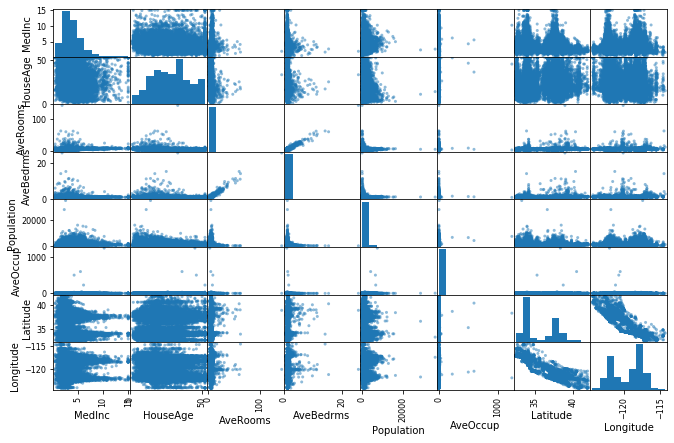

In [11]:
pd.plotting.scatter_matrix(X_train, figsize = (11, 7))
print('hola')

From here, we can begin to see some fairly strong relationships in the data.  For example, average bedrooms and average rooms appear to be correlated together.  And from this dataset, we see that latitude and longitude have a negative correlation.  Below, create a pandas dataframe of all of the spearman correlations.

In [12]:
corr_df = X_train.corr(method = 'spearman')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.150589,0.643557,-0.255669,0.004239,-0.043947,-0.084719,-0.011826
HouseAge,-0.150589,1.000000,-0.232211,-0.119163,-0.280590,-0.021795,0.027456,-0.144479
AveRooms,0.643557,-0.232211,1.000000,0.083910,-0.106319,0.020672,0.131109,-0.047241
AveBedrms,-0.255669,-0.119163,0.083910,1.000000,0.024899,-0.132957,0.045565,0.014685
Population,0.004239,-0.280590,-0.106319,0.024899,1.000000,0.241225,-0.115284,0.115223
AveOccup,-0.043947,-0.021795,0.020672,-0.132957,0.241225,1.000000,-0.149497,0.179102
Latitude,-0.084719,0.027456,0.131109,0.045565,-0.115284,-0.149497,1.000000,-0.879181
Longitude,-0.011826,-0.144479,-0.047241,0.014685,0.115223,0.179102,-0.879181,1.000000


In [13]:
corr_df[:2]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.150589,0.643557,-0.255669,0.004239,-0.043947,-0.084719,-0.011826
HouseAge,-0.150589,1.000000,-0.232211,-0.119163,-0.280590,-0.021795,0.027456,-0.144479


And create a heatmap of the absolute values of the correlations.

> Set annot=True to see the values.

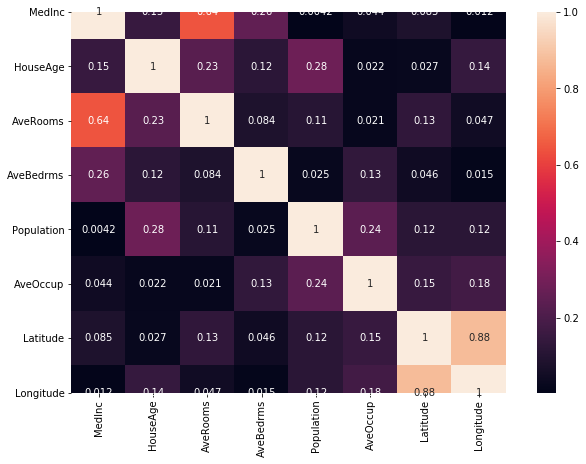

In [46]:
import seaborn as sn
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(11, 7)
ax = fig.add_subplot(111)
sn.heatmap(np.abs(corr_df), annot=True, ax = ax, square=True)

So we can see from the above that the highest correlated features are:

* latitude and longitude and
* average rooms and median Income

Let's try removing latitude and median income, as they appear repeats.  Then fit the model again.

In [57]:
X_train_pruned = X_train.drop(columns = ['MedInc', 'Latitude'])

In [58]:
X_validate_pruned = X_validate.drop(columns = ['MedInc', 'Latitude'])

Then train and score the model again.

In [60]:
model = LinearRegression()
model.fit(X_train_pruned, y_train).score(X_validate_pruned, y_validate)
# 0.122

0.12264546167624989

That did not work at all.

Let's try only removing latitude, as our scatter plot also indicates that it's correlated with longitude.

In [64]:
X_train_no_lat = X_train.drop(columns = ['Latitude'])
X_validate_no_lat = X_validate.drop(columns = ['Latitude'])

model = LinearRegression()
model.fit(X_train_no_lat, y_train).score(X_validate_no_lat, y_validate)
# 0.5017970877767626

0.5017970877767626

Here this is still a pretty sizable difference from our earlier score of .56.  But not as severe as before.  Let's keep latitude in the model, as we would prefer not to see that large a decrease in accuracy.

### Average Rooms and Average Bedrooms

We might expect that average rooms and average bedrooms are highly correlated.  Let's check the spearman and pearson correlation of just these two features.  

In [68]:
X[['AveRooms', 'AveBedrms']].corr(method = 'pearson')

,AveRooms,AveBedrms
AveRooms,1.000000,0.847621
AveBedrms,0.847621,1.000000


In [69]:
X[['AveRooms', 'AveBedrms']].corr(method = 'spearman')

,AveRooms,AveBedrms
AveRooms,1.000000,0.082046
AveBedrms,0.082046,1.000000


Here, we see that the pearson correlation picks up on the correlation between the two features.  Let's try removing AverageBedrooms, and checking the score.

In [72]:
X_train_no_br = X_train.drop(columns = ['AveBedrms'])
X_validate_no_br = X_validate.drop(columns = ['AveBedrms'])

model = LinearRegression()
model.fit(X_train_no_br, y_train).score(X_validate_no_br, y_validate)
# 0.5865

0.5865773925702333

Here, we see that we maintain our high score, even while removing our feature.

Finally, let's use permutation importance to see if there are any other features we can try removing as they have a low feature importance.

> Normally, we'll do this before we check for correlated features. 

In [74]:
from eli5.sklearn import PermutationImportance
import eli5


perm = PermutationImportance(model).fit(X_validate_no_br, y_validate)

exp_df = eli5.explain_weights_df(perm, feature_names = list(X_train_no_br.columns))
exp_df

,feature,weight,std
0,Latitude,1.405079,0.019725
1,Longitude,1.392808,0.036244
2,MedInc,0.738709,0.017089
3,HouseAge,0.026733,0.003086
4,AveRooms,0.002653,0.001102
5,AveOccup,0.001075,0.000141
6,Population,0.000168,0.000049


We can see that only the top four features appear significant. 

In [78]:
cols = exp_df.feature.values[:4]
model = LinearRegression()
model.fit(X_train_no_br[cols], y_train).score(X_validate_no_br[cols], y_validate)

0.5861531982152228

And let's see how well the model performs on the test set.

In [80]:
model.score(X_test[cols], y_test)

0.5758041809195441

So we maintained our score.

### Summary

In this lesson we practiced both discovering correlated features in pandas and also removing highly correlated features.  We saw that just because two features are highly correlated does not necessarily mean that we can remove the feature without suffering a reducting in our accuracy score.  We also saw that we should check for both the pearson and spearman correlation to look for redundant features.